In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
import time

In [2]:
df = pd.read_csv('S:/Stevens/2nd Semester/CPE695/HWK/Final project/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [4]:
not_need = ['WindGustDir','WindDir9am','WindDir3pm']
df = df.drop(not_need, axis = 1)
df = df.dropna(subset = ['RainToday'])
for column in list(df.columns[df.isnull().sum() > 0]):
  mean_val = df[column].mean()
  df[column].fillna(mean_val, inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.472516,7.63054,44.0,20.0,24.0,...,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.472516,7.63054,44.0,4.0,22.0,...,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.472516,7.63054,46.0,19.0,26.0,...,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.472516,7.63054,24.0,11.0,9.0,...,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.472516,7.63054,41.0,7.0,20.0,...,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,0.2,No


In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.00000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,12.184824,23.235120,2.349974,5.472516,7.63054,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183,2.313202
std,6.393226,7.106739,8.465173,3.179313,2.74139,13.131794,8.852853,8.718653,18.960664,20.546968,6.749189,6.682526,2.284253,2.109458,6.480860,6.872826,8.334842
min,-8.500000,-4.800000,0.000000,0.000000,0.00000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,7.63054,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000
50%,12.000000,22.700000,0.000000,5.472516,7.63054,39.000000,13.000000,18.631141,70.000000,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.800000,21.300000,0.000000
75%,16.800000,28.200000,0.800000,5.472516,8.70000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.600000
max,33.900000,48.100000,371.000000,145.000000,14.50000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [6]:
def Bool(x):
    if x == 'No':
        return 0
    else:
        return 1
    
df['RainToday']=df['RainToday'].apply(lambda x:Bool(x))
df['RainTomorrow']=df['RainTomorrow'].apply(lambda x:Bool(x))

df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df.drop(['Date'], axis = 1,inplace=True)

def season(x):
    if x == 12 or x <=2:
        return 'summer'
    elif x >= 3 and x <= 5:
        return 'fall'
    elif x >= 6 and x <= 8:
        return 'winter'
    else:
        return 'spring'
            
df['season']=df['month'].apply(lambda x:season(x))
df.drop(['month'], axis = 1,inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,season
0,Albury,13.4,22.9,0.6,5.472516,7.63054,44.0,20.0,24.0,71.0,...,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0.0,0,summer
1,Albury,7.4,25.1,0.0,5.472516,7.63054,44.0,4.0,22.0,44.0,...,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0.0,0,summer
2,Albury,12.9,25.7,0.0,5.472516,7.63054,46.0,19.0,26.0,38.0,...,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0.0,0,summer
3,Albury,9.2,28.0,0.0,5.472516,7.63054,24.0,11.0,9.0,45.0,...,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,1.0,0,summer
4,Albury,17.5,32.3,1.0,5.472516,7.63054,41.0,7.0,20.0,82.0,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0.2,0,summer


In [7]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
MinTemp,1.000000,0.734443,0.103759,0.354792,0.052123,0.174089,0.174932,0.174369,-0.232834,0.005606,-0.424964,-0.434899,0.061418,0.015780,0.898945,0.700211,0.056096,0.125207,0.084179
MaxTemp,0.734443,1.000000,-0.074601,0.444030,0.332758,0.067158,0.014405,0.050782,-0.501386,-0.500666,-0.309206,-0.397853,-0.227938,-0.215400,0.881746,0.970337,-0.228644,-0.044225,-0.159270
Rainfall,0.103759,-0.074601,1.000000,-0.038223,-0.173466,0.127944,0.086387,0.057063,0.222158,0.250666,-0.160402,-0.120952,0.172047,0.146276,0.011426,-0.077914,0.500997,0.308557,0.239032
Evaporation,0.354792,0.444030,-0.038223,1.000000,0.290782,0.148147,0.141341,0.094617,-0.378629,-0.291109,-0.212379,-0.232009,-0.152665,-0.148212,0.418208,0.430683,-0.141750,-0.031964,-0.089961
Sunshine,0.052123,0.332758,-0.173466,0.290782,1.000000,-0.022076,0.006504,0.039886,-0.353333,-0.448358,0.031079,-0.015370,-0.539298,-0.561349,0.210649,0.350347,-0.240535,-0.226054,-0.328806
WindGustSpeed,0.174089,0.067158,0.127944,0.148147,-0.022076,1.000000,0.578200,0.659018,-0.209161,-0.025803,-0.426819,-0.384863,0.052384,0.080574,0.147241,0.032821,0.149789,0.157042,0.225592
WindSpeed9am,0.174932,0.014405,0.086387,0.141341,0.006504,0.578200,1.000000,0.513481,-0.268841,-0.031046,-0.214824,-0.164698,0.019081,0.041016,0.128623,0.004804,0.101884,0.066600,0.089463
WindSpeed3pm,0.174369,0.050782,0.057063,0.094617,0.039886,0.659018,0.513481,1.000000,-0.144393,0.015896,-0.277272,-0.239743,0.041166,0.019464,0.162637,0.028724,0.079274,0.046925,0.085901
Humidity9am,-0.232834,-0.501386,0.222158,-0.378629,-0.353333,-0.209161,-0.268841,-0.144393,1.000000,0.660919,0.131073,0.175852,0.355036,0.275229,-0.471616,-0.493774,0.351021,0.171227,0.256047
Humidity3pm,0.005606,-0.500666,0.250666,-0.291109,-0.448358,-0.025803,-0.031046,0.015896,0.660919,1.000000,-0.026423,0.048032,0.401187,0.408633,-0.218489,-0.556344,0.373505,0.309260,0.441531


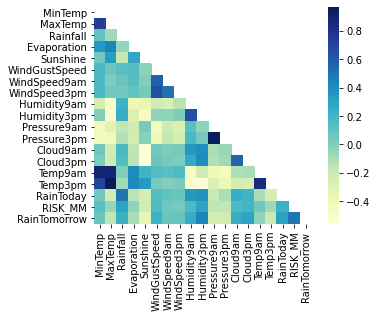

In [8]:

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, cmap = "YlGnBu",square=True)
plt.show()

In [9]:
col = ['Location','season']
df = pd.get_dummies(df, columns = col, drop_first=True)

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,season_spring,season_summer,season_winter
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.00000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,...,140787.00000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,12.184824,23.235120,2.349974,5.472516,7.63054,39.970520,13.990496,18.631141,68.826833,51.449288,...,0.02101,0.019675,0.021238,0.016877,0.020769,0.020904,0.021195,0.243517,0.240867,0.252623
std,6.393226,7.106739,8.465173,3.179313,2.74139,13.131794,8.852853,8.718653,18.960664,20.546968,...,0.14342,0.138882,0.144176,0.128809,0.142611,0.143063,0.144035,0.429206,0.427612,0.434518
min,-8.500000,-4.800000,0.000000,0.000000,0.00000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,7.63054,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.700000,0.000000,5.472516,7.63054,39.000000,13.000000,18.631141,70.000000,51.449288,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.800000,5.472516,8.70000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,33.900000,48.100000,371.000000,145.000000,14.50000,135.000000,130.000000,87.000000,100.000000,100.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
y = df['RainTomorrow']
X = df.drop(['RainTomorrow','RISK_MM'], axis = 1)
print('The classcification report in original y without any processing：{}'.format(Counter(y)))

The classcification report in original y without any processing：Counter({0: 109586, 1: 31201})


In [12]:
ros = RandomOverSampler(random_state=0, sampling_strategy='auto') 
X_ros, y_ros = ros.fit_resample(X, y)
print('The classification report of y after random oversampling：{}'.format(Counter(y_ros)))

The classification report of y after random oversampling：Counter({0: 109586, 1: 109586})


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.2, random_state = 50)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [15]:
pipe = Pipeline([
          ('standerlization', preprocessing.StandardScaler()),
          ('lg', LogisticRegression(solver = 'lbfgs', max_iter = 1000))
])

param_grid = {'lg__C': [1000, 100, 10, 1, 0.1, 0.01]}
grid = GridSearchCV(pipe, cv = 3, param_grid = param_grid, scoring = 'roc_auc', refit=True, verbose=1)
grid_fit = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [16]:
report(grid.cv_results_)

Model with rank: 1
Mean validation score: 0.873 (std: 0.001)
Parameters: {'lg__C': 10}

Model with rank: 2
Mean validation score: 0.873 (std: 0.001)
Parameters: {'lg__C': 100}

Model with rank: 3
Mean validation score: 0.873 (std: 0.001)
Parameters: {'lg__C': 1000}



In [17]:
start =time.perf_counter()

lg = LogisticRegression(C = 1000, solver = 'lbfgs', max_iter = 5000)
lg.fit(X_train, y_train)

end = time.perf_counter()

predict = lg.predict(X_test)
predict_prob = lg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predict_prob[:, 1])
print('AUC: {:.2f}'.format(auc(fpr, tpr)))

AUC: 0.87


In [18]:
print('classifier accuracy is {:.2f}'.format(lg.score(X_test, y_test)))

cm = confusion_matrix(y_test, predict)
print('confusion matrix:\n', cm)

print('classification report:\n', classification_report(y_test, predict))
print('Running time: %s Seconds'%(end-start))

classifier accuracy is 0.79
confusion matrix:
 [[17596  4337]
 [ 4825 17077]]
classification report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79     21933
           1       0.80      0.78      0.79     21902

    accuracy                           0.79     43835
   macro avg       0.79      0.79      0.79     43835
weighted avg       0.79      0.79      0.79     43835

Running time: 1.4455235999999978 Seconds


In [19]:
lg.coef_

array([[ 0.14710986, -0.39283291,  0.11956302,  0.00170622, -0.35651632,
         0.78096465, -0.04136478, -0.16380509,  0.10768864,  1.23671111,
         1.09840753, -1.5887858 , -0.00306156,  0.29831941,  0.25068402,
         0.27889518,  0.22785848, -0.09509271, -0.03003857, -0.12458174,
        -0.06849977, -0.11419656, -0.05720458, -0.07946369, -0.18891302,
        -0.05444247, -0.05265128, -0.10738001, -0.04862343, -0.24979444,
        -0.17582448, -0.14463134, -0.15471045, -0.09113345, -0.10226091,
        -0.13203721, -0.07863085, -0.10544587, -0.07684447, -0.17148481,
        -0.09422583, -0.06565744, -0.17425361, -0.16151285, -0.07322385,
        -0.07652688, -0.03010595, -0.02428221, -0.04212381, -0.06849737,
        -0.07703678, -0.12226453, -0.02169534, -0.1002181 , -0.13013418,
        -0.26019909, -0.02051474, -0.08491933, -0.05853066, -0.06175117,
        -0.10709183, -0.07230913, -0.02062755, -0.20426948, -0.12363889,
         0.00367318, -0.13857471,  0.09327831]])

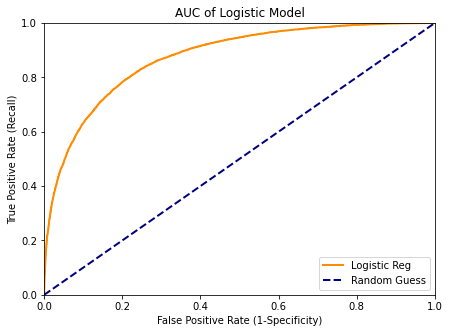

In [20]:
plt.figure(figsize = (7, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'Logistic Reg')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Random Guess')
plt.title('AUC of Logistic Model')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show();

In [21]:
param_grid = {
    'max_depth' : [1, 2, 3, 4, 5, 6, 7],
    'max_leaf_nodes' : [3,5,7],
    'min_samples_split' : [2, 4, 6],
    'min_samples_leaf' : [1, 3, 5]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=3, refit = True, verbose=1)
grid_fit = grid.fit(X_train, y_train)

Fitting 3 folds for each of 189 candidates, totalling 567 fits


In [22]:
report(grid.cv_results_)

Model with rank: 1
Mean validation score: 0.748 (std: 0.004)
Parameters: {'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.748 (std: 0.004)
Parameters: {'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 4}

Model with rank: 1
Mean validation score: 0.748 (std: 0.004)
Parameters: {'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 6}

Model with rank: 1
Mean validation score: 0.748 (std: 0.004)
Parameters: {'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.748 (std: 0.004)
Parameters: {'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_leaf': 3, 'min_samples_split': 4}

Model with rank: 1
Mean validation score: 0.748 (std: 0.004)
Parameters: {'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_leaf': 3, 'min_samples_split': 6}

Model with rank: 1
Mean validation score: 0.74

In [23]:
start2 =time.perf_counter()

dt = DecisionTreeClassifier(
    max_depth = 4, max_leaf_nodes = 7, min_samples_leaf = 1, min_samples_split = 4) 
dt.fit(X_train,y_train)

end2 = time.perf_counter()

predict2 = dt.predict(X_test)
predict_prob2 = dt.predict_proba(X_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_prob2[:, 1])
print('AUC: {:.2f}'.format(auc(fpr2, tpr2)))

AUC: 0.80


In [24]:
print('classifier accuracy is {:.2f}'.format(dt.score(X_test, y_test)))

cm2 = confusion_matrix(y_test, predict2)
print('confusion matrix:\n', cm2)

print('classification report:\n', classification_report(y_test, predict2))
print('Running time: %s Seconds'%(end2-start2))

classifier accuracy is 0.75
confusion matrix:
 [[16493  5440]
 [ 5500 16402]]
classification report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75     21933
           1       0.75      0.75      0.75     21902

    accuracy                           0.75     43835
   macro avg       0.75      0.75      0.75     43835
weighted avg       0.75      0.75      0.75     43835

Running time: 0.5325073000000202 Seconds


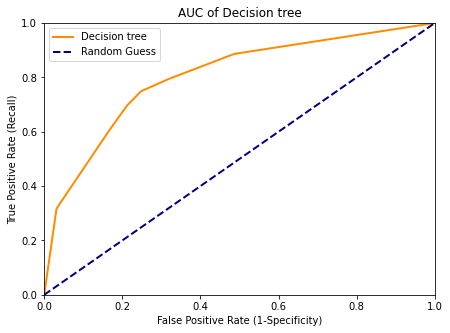

In [25]:
plt.figure(figsize = (7, 5))
plt.plot(fpr2, tpr2, color = 'darkorange', lw = 2, label = 'Decision tree')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Random Guess')
plt.title('AUC of Decision tree')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show();

In [26]:
start3 = time.perf_counter()

nn = MLPClassifier(hidden_layer_sizes = (30,30,30),
             activation = 'logistic',
             solver = 'lbfgs',
             max_iter = 1000)

nn.fit(X_train,y_train)

end3 = time.perf_counter()

predict3 = nn.predict(X_test)
predict_prob3 = nn.predict_proba(X_test)
fpr3, tpr3, thresholds3 = roc_curve(y_test, predict_prob3[:, 1])
print('AUC: {:.2f}'.format(auc(fpr3, tpr3)))

AUC: 0.91


E:\Anacoda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [27]:
print('classifier accuracy is {:.2f}'.format(nn.score(X_test, y_test)))

cm3 = confusion_matrix(y_test, predict3)
print('confusion matrix:\n', cm3)

print('classification report:\n', classification_report(y_test, predict3))
print('Running time: %s Seconds'%(end3-start3))

classifier accuracy is 0.83
confusion matrix:
 [[17588  4345]
 [ 3283 18619]]
classification report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82     21933
           1       0.81      0.85      0.83     21902

    accuracy                           0.83     43835
   macro avg       0.83      0.83      0.83     43835
weighted avg       0.83      0.83      0.83     43835

Running time: 483.06068980000003 Seconds


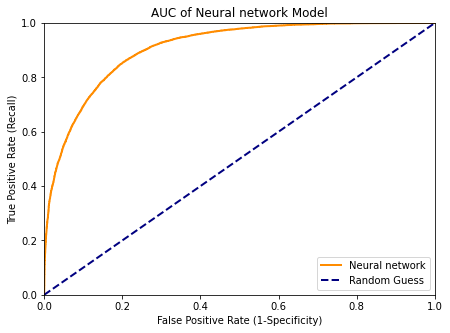

In [28]:
plt.figure(figsize = (7, 5))
plt.plot(fpr3, tpr3, color = 'darkorange', lw = 2, label = 'Neural network')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Random Guess')
plt.title('AUC of Neural network Model')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show();

In [29]:
param_grid = {'C':[0.1,1,10],
              'tol':[0.0001,0.001]}

grid = GridSearchCV(svm.LinearSVC(), param_grid=param_grid, cv=3, refit = True, verbose=1)
grid_fit = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


E:\Anacoda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\Anacoda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\Anacoda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\Anacoda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\Anacoda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\Anacoda

In [30]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(grid.cv_results_)

Model with rank: 1
Mean validation score: 0.788 (std: 0.001)
Parameters: {'C': 0.1, 'tol': 0.001}

Model with rank: 2
Mean validation score: 0.788 (std: 0.001)
Parameters: {'C': 0.1, 'tol': 0.0001}

Model with rank: 3
Mean validation score: 0.788 (std: 0.001)
Parameters: {'C': 1, 'tol': 0.0001}



In [38]:
start4 = time.perf_counter()

SV = svm.LinearSVC(C=1, tol = 0.0001)
SV.fit(X_train,y_train)

end4 = time.perf_counter()

predict4 = SV.predict(X_test)

E:\Anacoda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [39]:
print('classifier accuracy is {:.2f}'.format(SV.score(X_test, y_test)))

cm4 = confusion_matrix(y_test, predict4)
print('confusion matrix:\n', cm4)

print('classification report:\n', classification_report(y_test, predict4))
print('Running time: %s Seconds'%(end4-start4))

classifier accuracy is 0.79
confusion matrix:
 [[17639  4294]
 [ 4914 16988]]
classification report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79     21933
           1       0.80      0.78      0.79     21902

    accuracy                           0.79     43835
   macro avg       0.79      0.79      0.79     43835
weighted avg       0.79      0.79      0.79     43835

Running time: 60.02071509999951 Seconds


<Figure size 504x360 with 0 Axes>

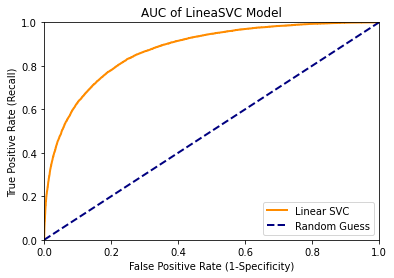

In [40]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize = (7, 5))
plot_roc_curve(SV, X_test, y_test,color = 'darkorange', lw = 2, label = 'Linear SVC')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Random Guess')
plt.title('AUC of LineaSVC Model')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show();
plt.show()

<Figure size 504x360 with 0 Axes>

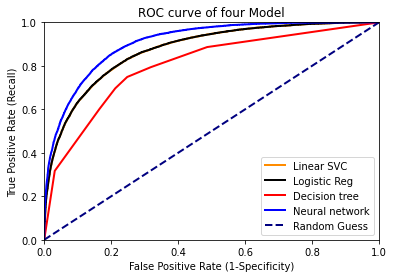

In [46]:
plt.figure(figsize = (7, 5))
plot_roc_curve(SV, X_test, y_test,color = 'darkorange', lw = 2, label = 'Linear SVC')
plt.plot(fpr, tpr, color = 'black', lw = 2, label = 'Logistic Reg')
plt.plot(fpr2, tpr2, color = 'r', lw = 2, label = 'Decision tree')
plt.plot(fpr3, tpr3, color = 'b', lw = 2, label = 'Neural network')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Random Guess')
plt.title('ROC curve of four Model')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show();
plt.show()